# 실수 입력 RBM과 이진입력 RBM 비교

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
# CD-1을 이용한 실수 입력 RBM 알고리즘
# 은닉노드 2개

def Gau_Ber_RBM(data, _w, _a, _b, learning_rate, phase = 'training'):
    
    if phase == 'training':
        h0_p = sigmoid(np.matmul(data, _w) + _b)
        h0 = np.random.binomial(1, h0_p)
        x_mu = np.matmul(h0, np.transpose(_w)) + _a
        x = np.random.normal(x_mu, 1)
        h1_p = sigmoid(np.matmul(x, _w) + _b)
        h1 = np.random.binomial(1, h1_p)
        w = _w + learning_rate*(np.matmul(np.transpose(data), h0) - np.matmul(np.transpose(x), h1))/len(data)
        a = _a + learning_rate*(np.mean(data - x, 0))
        b = _b + learning_rate*(np.mean(h0 - h1, 0))
        return w, a, b
    
    elif phase == 'loss':
        h0_p = sigmoid(np.matmul(data, _w) + _b)
        h0 = np.round(h0_p)
        x = np.matmul(h0, np.transpose(_w)) + _a
        reconstruction_error = np.mean((data-x)**2)
        return reconstruction_error
    
    else:
        print('phase must be training or loss')

In [4]:
# CD-1을 이용한 이진 입력 RBM 알고리즘
# 은닉노드 2개

def Ber_Ber_RBM(data, _w, _a, _b, learning_rate, phase = 'training'):
    
    if phase=='training':
        h0_p = sigmoid(np.matmul(data, _w) + _b)
        h0 = np.random.binomial(1, h0_p)
        x_p = sigmoid(np.matmul(h0, np.transpose(_w)) + _a)
        x = np.random.binomial(1, x_p)
        h1_p = sigmoid(np.matmul(x, _w) + _b)
        h1 = np.random.binomial(1, h1_p)
        w = _w + learning_rate*(np.matmul(np.transpose(data), h0) - np.matmul(np.transpose(x), h1))/len(data)
        a = _a + learning_rate*(np.mean(data - x, 0))
        b = _b + learning_rate*(np.mean(h0 - h1, 0))
        return w, a, b
    
    elif phase=='loss':
        h0_p = sigmoid(np.matmul(data, _w) + _b)
        h0 = np.round(h0_p)
        x_p = sigmoid(np.matmul(h0, np.transpose(_w)) + _a)
        x = np.round(x_p)      
        reconstruction_error = np.mean((data-x)**2)
        return reconstruction_error
    
    else:
        print('phase must be training or loss')

In [5]:
# 데이터 불러오기
url='https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris = pd.read_csv(url)

# iris 데이터를 입력 데이터와 출력 데이터로 분리        
n = iris.shape[0]
irisX = np.array(iris.iloc[:,:4])
irisY = iris.iloc[:,4]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 실수 입력 RBM을 위한 입력 데이터의 표준화(standardization) 

moments = np.mean(irisX, 0), np.var(irisX, 0)
standardized_irisX = (irisX-moments[0])/np.sqrt(moments[1])  

# 이진 입력 RBM을 위한 입력 데이터의 정규화(normalization) 

minmax = np.amin(irisX, 0), np.amax(irisX, 0)
normalized_irisX = (irisX-minmax[0])/(minmax[1]-minmax[0])  

In [7]:
# 입력노드 4개 은닉노드 2개의 RBM 구축
_w = np.random.normal(size = [4,2], scale = 0.1)
_a = np.zeros([4])
_b = np.zeros([2])

tr_h = sigmoid(np.matmul(normalized_irisX, _w) + _b)

In [8]:
learning_rate = 5*1e-3
max_epoch = 1500
batch_size= 5

In [9]:
# 실수 입력 RBM 학습
for learning_epoch in range(max_epoch):
    rannum = np.random.permutation(len(standardized_irisX))
    num_batch = int(len(standardized_irisX)/batch_size)
    
    for it in range(num_batch):
        batch_X = standardized_irisX[rannum[it*batch_size:(it+1)*batch_size]]
        w, a, b = Gau_Ber_RBM(batch_X, _w, _a, _b, learning_rate, phase = 'training')
        
    if (learning_epoch+1)%100 == 0:
        print(Gau_Ber_RBM(standardized_irisX, w, a, b, learning_rate, phase = 'loss'))

real_h = sigmoid(np.matmul(standardized_irisX, w) + b)

0.9296087934806269
0.9298296649890005
0.929909798261842
0.9304078521990228
0.9287106419322015
0.932212067611906
0.9313708130722756
0.9308364613098672
0.9294048667878493
0.9297937251487618
0.9315218166681837
0.9297920639585584
0.9311924730362193
0.9308128420210179
0.9307513094667308


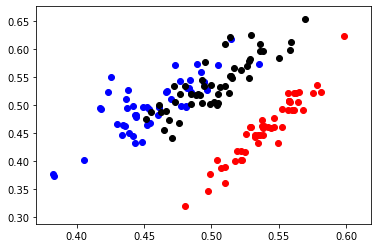

In [10]:
# 실수 입력 RBM 결과 산점도
plt.scatter(real_h[np.where(irisY=='setosa')[0], 0], real_h[np.where(irisY=='setosa')[0], 1], color = 'red')
plt.scatter(real_h[np.where(irisY=='virginica')[0], 0], real_h[np.where(irisY=='virginica')[0], 1], color = 'blue')
plt.scatter(real_h[np.where(irisY=='versicolor')[0], 0], real_h[np.where(irisY=='versicolor')[0], 1], color = 'black')
plt.show()

In [11]:
# 이진 입력 RBM 학습
for learning_epoch in range(max_epoch):
    rannum = np.random.permutation(len(normalized_irisX))
    num_batch = int(len(normalized_irisX)/batch_size)
    
    for it in range(num_batch):
        batch_X = normalized_irisX[rannum[it*batch_size:(it+1)*batch_size]]
        w, a, b = Ber_Ber_RBM(batch_X, _w, _a, _b, learning_rate, phase = 'training')
        
    if (learning_epoch+1)%100 == 0:
        print(Ber_Ber_RBM(normalized_irisX, w, a, b, learning_rate, phase = 'loss'))

binary_h = sigmoid(np.matmul(normalized_irisX, w) + b)      

0.3054210198285401
0.342746820205188
0.342746820205188
0.32163570909407685
0.3054210198285401
0.3265321309396512
0.30709867205703983
0.342746820205188
0.3731634868718547
0.35205237576074355
0.3164042276125954
0.342746820205188
0.269772871680392
0.3265321309396512
0.269772871680392


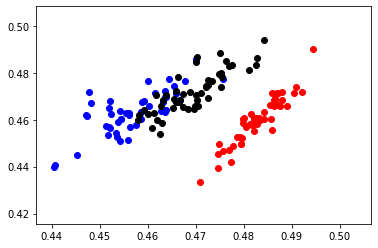

In [12]:
# 이진 입력 RBM 결과 산점도
plt.scatter(binary_h[np.where(irisY=='setosa')[0], 0], binary_h[np.where(irisY=='setosa')[0], 1], color = 'red')
plt.scatter(binary_h[np.where(irisY=='virginica')[0], 0], binary_h[np.where(irisY=='virginica')[0], 1], color = 'blue')
plt.scatter(binary_h[np.where(irisY=='versicolor')[0], 0], binary_h[np.where(irisY=='versicolor')[0], 1], color = 'black')
plt.show()